In [22]:
# Import libraries
import numpy 
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

In [2]:
# Import data
df = numpy.loadtxt("titanic_all_numeric.csv", delimiter=",", usecols=(0, 1,2,3,4,5,6,8,9,10),skiprows=(1))
# split into input and output variables
predictors = df[:,1:10]
survived = df[:,0]

In [3]:
# Convert the target to categorical: target
target = to_categorical(survived)
# Specify the model
n_cols = predictors.shape[1]
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
model.fit(predictors,target)

Epoch 1/1
891/891 [==============================] - 1s 2ms/step - loss: 1.7314 - acc: 0.6094


# Changing optimization parameters

In [5]:
# Import the SGD optimizer
from keras.optimizers import SGD

def get_new_model():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return (model)
# Create list of learning rates: lr_to_test
lr_to_test =[.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer,loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors,target)



Testing model with learning rate: 0.000001

Epoch 1/1
891/891 [==============================] - 0s 221us/step - loss: 5.2665


Testing model with learning rate: 0.010000

Epoch 1/1
891/891 [==============================] - 0s 225us/step - loss: 1.2691


Testing model with learning rate: 1.000000

Epoch 1/1
891/891 [==============================] - 0s 222us/step - loss: 9.7417


# Evaluating model accuracy on validation dataset

In [6]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
hist =model.fit(predictors,target,validation_split=0.3)

Train on 623 samples, validate on 268 samples
Epoch 1/1
623/623 [==============================] - 0s 470us/step - loss: 0.7323 - acc: 0.6453 - val_loss: 0.9339 - val_acc: 0.6903


# Early stopping: Optimizing the optimization

In [7]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor =EarlyStopping(patience=2)

# Fit the model
model.fit(predictors,target,validation_split=0.3,epochs=30,callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s 526us/step - loss: 0.8688 - acc: 0.6100 - val_loss: 0.5855 - val_acc: 0.6828
Epoch 2/30
623/623 [==============================] - 0s 70us/step - loss: 0.7550 - acc: 0.6244 - val_loss: 0.6155 - val_acc: 0.7015
Epoch 3/30
623/623 [==============================] - 0s 70us/step - loss: 0.6437 - acc: 0.6485 - val_loss: 0.5258 - val_acc: 0.7239
Epoch 4/30
623/623 [==============================] - 0s 71us/step - loss: 0.6147 - acc: 0.6533 - val_loss: 0.5633 - val_acc: 0.7239
Epoch 5/30
623/623 [==============================] - 0s 76us/step - loss: 0.6166 - acc: 0.6709 - val_loss: 0.5212 - val_acc: 0.7388
Epoch 6/30
623/623 [==============================] - 0s 74us/step - loss: 0.6179 - acc: 0.6774 - val_loss: 0.6243 - val_acc: 0.7127
Epoch 7/30
623/623 [==============================] - 0s 78us/step - loss: 0.6592 - acc: 0.6533 - val_loss: 0.4848 - val_acc: 0.7388
Epoch 8/30
623/623 [==

# Experimenting with wider networks

In [8]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)
# Create the new model: model_2
model_1 =Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_2
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Create the new model: model_2
model_2 =Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)


In [10]:
# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)


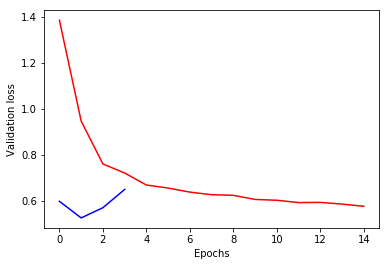

In [23]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()

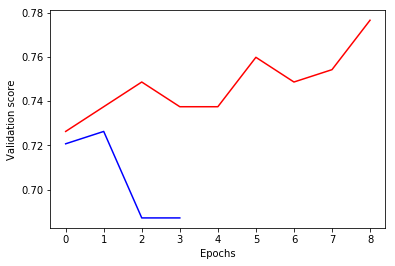

In [28]:
# Create the plot
plt.plot(model_1_training.history['val_acc'], 'r', model_2_training.history['val_acc'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

# Adding layers to a network

In [30]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)
# Create the new model: model_3
model_3 =Sequential()

# Add the first and second layers
model_3.add(Dense(50, activation='relu', input_shape=input_shape))
model_3.add(Dense(50, activation='relu'))

# Add the output layer
model_3.add(Dense(2, activation='softmax'))

# Compile model_2
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [31]:
# Create the new model: model_4
model_4 = Sequential()

# Add the first, second, and third hidden layers
model_4.add(Dense(50, activation='relu', input_shape=input_shape))
model_4.add(Dense(50, activation='relu'))
model_4.add(Dense(50, activation='relu'))

# Add the output layer
model_4.add(Dense(2, activation='softmax'))

# Compile model_2
model_4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
# Fit model 3
model_3_training = model_3.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

In [33]:
# Fit model 4
model_4_training = model_4.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

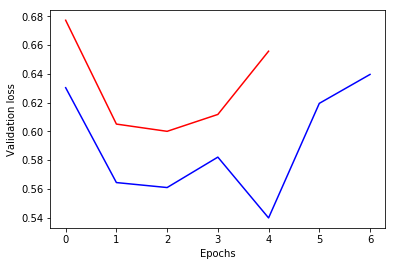

In [34]:
# Create the plot
plt.plot(model_3_training.history['val_loss'], 'r', model_4_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()

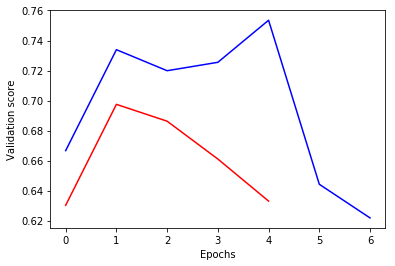

In [35]:
# Create the plot
plt.plot(model_3_training.history['val_acc'], 'r', model_4_training.history['val_acc'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

# Calculate predictions

In [36]:
# Calculate predictions: predictions
pred_data = numpy.loadtxt("pred_data.csv", delimiter=",", usecols=(1,2,3,4,5,6,8,9,10),skiprows=(1))

predictions =model_1.predict(pred_data)

In [37]:
# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

[0.29237416 0.84376657 0.48158032 0.7591876  0.29385516 0.36938214
 0.5767308  0.43612984 0.4801239 ]
